# 1 EDA (Exploratory Data Analysis)

## 1.1 EDA data description
### Visualization of data relationships, data types, null and NaN values, duplicates, and unique values present in each column, along with descriptive insights.
### Obs.: The **orders** table has the column **dias_since_prior_order**, which is documented with the name **dias_since_prior** in the task pdf, it will be considered the official name present in the table and not in the .pdf doc

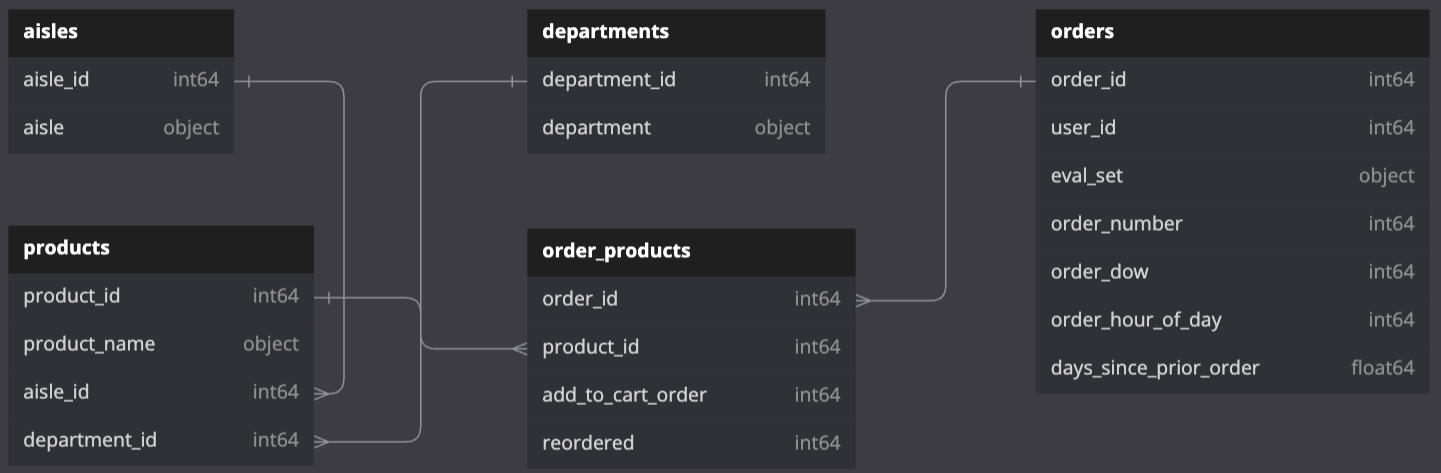

In [1]:
from IPython.display import display, Image
path_img = '/Users/marcobispo/Documents/Bees-Data-Challenge/data_schema.png'
display(Image(filename=path_img))

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
def read_multiple_csv(file_paths, names):
    if len(file_paths) != len(names):
        raise ValueError("The length of file_paths and names must be the same.")
    dataframes = {}
    for file_path, name in zip(file_paths, names):
        dataframes[name] = pd.read_csv(file_path)
    return dataframes
file_path = '/Users/marcobispo/Documents/Bees-Data-Challenge/Data-Challenge-V/online-shopping-dataset/'
file_paths = [file_path+'aisles.csv',
                file_path+'departments.csv',
                file_path+'order_products.csv',
                file_path+'orders.csv',
                file_path+'products.csv']
names = ['aisles', 'departments', 'order_products','orders','products']
dfs = read_multiple_csv(file_paths, names)
import pandas as pd
dict_quality_data = {
    'df_name': [],
    'column_name': [],
    'column_type': [],
    'NaN': [],
    'null': [],
    'duplicates':[],
    'uniques':[],
    'size':[],
    'describe':[]
}
dict_describe = {
    'aisles':{
        'aisle_id':'Uniquely identifies each aisle',
        'aisle':'Contains the name of the aisle'
    },
    'departments':{
        'department_id': 'Provides a unique identifier for each department',
        'department': 'Displays the name of the department'
    },
    'order_products':{
        'order_id':'Serves as a foreign key, linking to the unique order identifier',
        'product_id':'Functions as a foreign key, connecting to the unique product identifier',
        'add_to_cart_order': 'Reflects the order in which each product was added to the shopping cart',
        'reordered': 'Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not'
    },
    'orders':{
        'order_id': 'Uniquely identifies each order',
        'user_id': 'Identifies the customer associated with the order',
        'eval_set': 'Denotes the category to which this order belongs (refer to the SET descriptions below)'
            'The "SET" variable corresponds to one of two evaluation sets described below:'
            '■ "prior": Encompasses orders that occurred before the user\'s most recent order (approximately 3.2 million orders).'
            '■ "train": Comprises the training data supplied to participants (around 131,000 orders).',
        'order_number': "Represents the sequence number of the order for a user, where 1'denotes the first order and 'n' indicates the nth order",
        'order_dow': 'Indicates the day of the week when the order was placed',
        'order_hour_of_day': 'Specifies the hour at which the order was initiated',
        'days_since_prior_order': "Records the number of days that have elapsed since the user's previous order, capped at 30 days (with 'NAs' for the first order)"
        #days_since_prior:
    },
    'products':{
        'product_id': 'Serves as a unique identifier for each product',
        'product_name': 'Provides the name of the product',
        'aisle_id': 'Acts as a reference key for the aisle associated with the product',
        'department_id': 'Acts as a reference key for the department in which the product belongs'
    }
}
for name_df, df in dfs.items():
    for col in df.columns:
        series = df[col]
        n_nan = series.isna().sum()
        n_null = series.isnull().sum()
        duplicates = series.duplicated().sum()
        uniques = series.nunique()
        size = len(series)
        dict_quality_data['df_name'].append(name_df)
        dict_quality_data['column_name'].append(col)
        dict_quality_data['column_type'].append(series.dtype)
        dict_quality_data['NaN'].append(n_nan)
        dict_quality_data['null'].append(n_null)
        dict_quality_data['duplicates'].append(duplicates)
        dict_quality_data['uniques'].append(uniques)
        dict_quality_data['size'].append(size)
        dict_quality_data['describe'].append(dict_describe[name_df][col])
df_quality_data = pd.DataFrame(dict_quality_data)
display(df_quality_data)

,df_name,column_name,column_type,NaN,null,duplicates,uniques,size,describe
0,aisles,aisle_id,int64,0,0,0,134,134,Uniquely identifies each aisle
1,aisles,aisle,object,0,0,0,134,134,Contains the name of the aisle
2,departments,department_id,int64,0,0,0,21,21,Provides a unique identifier for each department
3,departments,department,object,0,0,0,21,21,Displays the name of the department
4,order_products,order_id,int64,0,0,30473023,3346083,33819106,"Serves as a foreign key, linking to the unique order identifier"
5,order_products,product_id,int64,0,0,33769421,49685,33819106,"Functions as a foreign key, connecting to the unique product identifier"
6,order_products,add_to_cart_order,int64,0,0,33818961,145,33819106,Reflects the order in which each product was added to the shopping cart
7,order_products,reordered,int64,0,0,33819104,2,33819106,"Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not"
8,orders,order_id,int64,0,0,0,3346083,3346083,Uniquely identifies each order
9,orders,user_id,int64,0,0,3139874,206209,3346083,Identifies the customer associated with the order


In [3]:
for name_df, df in dfs.items():
    print(name_df)
    display(df.head(2))

aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


departments


,department_id,department
0,1,frozen
1,2,other


order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


## 1.2 EDA data check
### Quick check to verify if the data descriptions match what is actually present in the dataframe otherwise, cleaning will be necessary.
### The description perfectly matches the data being analyzed however, the count of days of the week is starting from zero, for hours it makes sense, but for days not so much, but 7 values ​​are present within the list

In [4]:
reordered = dfs['order_products']['reordered'].unique().tolist()
reordered.sort()
print(reordered)

[0, 1]


In [5]:
order_number = dfs['orders']['order_number'].unique().tolist()
order_number.sort()
print(order_number)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [6]:
order_dow = dfs['orders']['order_dow'].unique().tolist()
order_dow.sort()
print(order_dow)

[0, 1, 2, 3, 4, 5, 6]


In [7]:
order_hour_of_day = dfs['orders']['order_hour_of_day'].unique().tolist()
order_hour_of_day.sort()
print(order_hour_of_day)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [8]:
days_since_prior_order = dfs['orders']['days_since_prior_order'].unique().tolist()
days_since_prior_order.sort()
print(days_since_prior_order)

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


## 1.3 Data Visualization:
### Which product had the biggest sales and reordered?
#### Bananas
### Which aisle had the biggest sales and reordered?
### Which department had the highest sales and reordered?
### Which user ID had the highest sales and reordered?
### Qual o combo de produtos mais vendidos?
### Which days of the week sell the most?
### Which days of the month sell the most?
### Which hours sell the most?
#### Note: eval_set equals prior that mens the clients really buy the products

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df_order_products_products = pd.merge(dfs['order_products'], dfs['products'], on='product_id', how='left')
df_order_products_products_aisles = pd.merge(df_order_products_products, dfs['aisles'], on='aisle_id', how='left')
df_order_products_products_aisles_departments = pd.merge(df_order_products_products_aisles, dfs['departments'], on='department_id', how='left')
df_order_products_products_aisles_departments_orders = pd.merge(df_order_products_products_aisles_departments, dfs['orders'], on='order_id', how='left')
df_order_products_products_aisles_departments_orders = df_order_products_products_aisles_departments_orders[["add_to_cart_order","reordered","product_name","aisle","eval_set","order_dow","order_hour_of_day","days_since_prior_order","user_id"]]
df_visualization = df_order_products_products_aisles_departments_orders
display(df_visualization)

,add_to_cart_order,reordered,product_name,aisle,eval_set,order_dow,order_hour_of_day,days_since_prior_order,user_id
0,1,1,Organic Egg Whites,eggs,prior,5,9,8.0,202279
1,2,1,Michigan Organic Kale,fresh vegetables,prior,5,9,8.0,202279
2,3,0,Garlic Powder,spices seasonings,prior,5,9,8.0,202279
3,4,1,Coconut Butter,oils vinegars,prior,5,9,8.0,202279
4,5,0,Natural Sweetener,baking ingredients,prior,5,9,8.0,202279
...,...,...,...,...,...,...,...,...,...
33819101,3,1,Natural Artesian Water,water seltzer sparkling water,train,0,10,4.0,169679
33819102,4,1,Twice Baked Potatoes,prepared meals,train,0,10,4.0,169679
33819103,1,1,Organic Unsweetened Almond Milk,soy lactosefree,train,6,10,8.0,139822
33819104,2,1,Creamy Peanut Butter,spreads,train,6,10,8.0,139822


In [11]:
question = 'Which product had the biggest sales and reordered?'



In [12]:
df_visualization_q1

,product_name,aisle,add_to_cart_order
3677,Banana,fresh fruits,2405664
3472,Bag of Organic Bananas,fresh fruits,2007396
31923,Organic Strawberries,fresh fruits,2005999
28843,Organic Baby Spinach,packaged vegetables fruits,1870623
30300,Organic Hass Avocado,fresh fruits,1497887
22415,Large Lemon,fresh fruits,1279007
23422,Limes,fresh fruits,1261016
28807,Organic Avocado,fresh fruits,1187054
42908,Strawberries,fresh fruits,1065577
31366,Organic Raspberries,packaged vegetables fruits,1031044


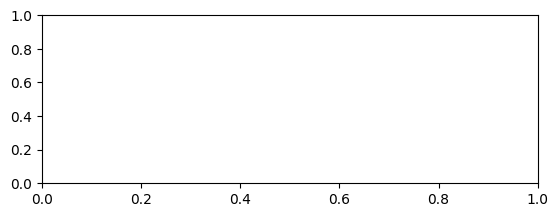

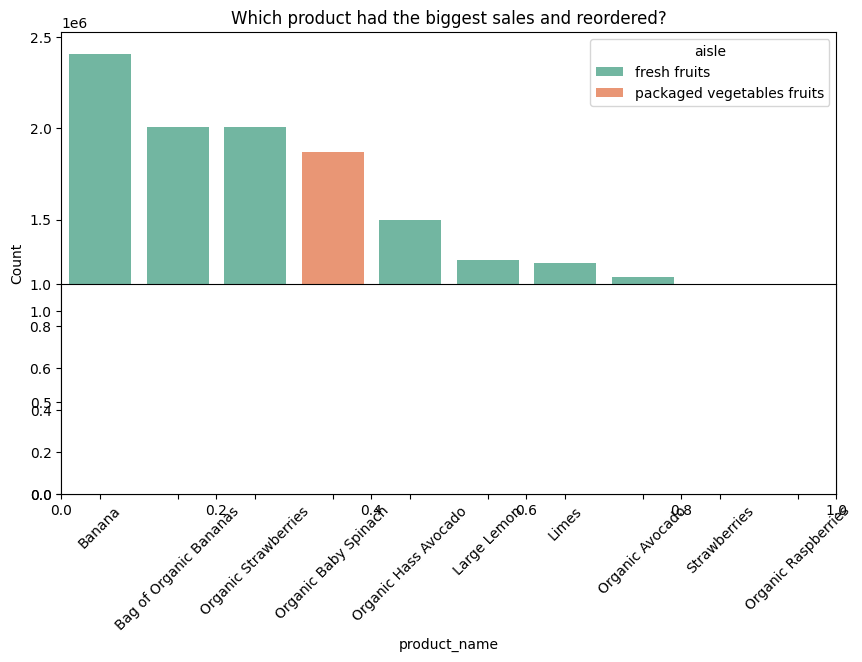

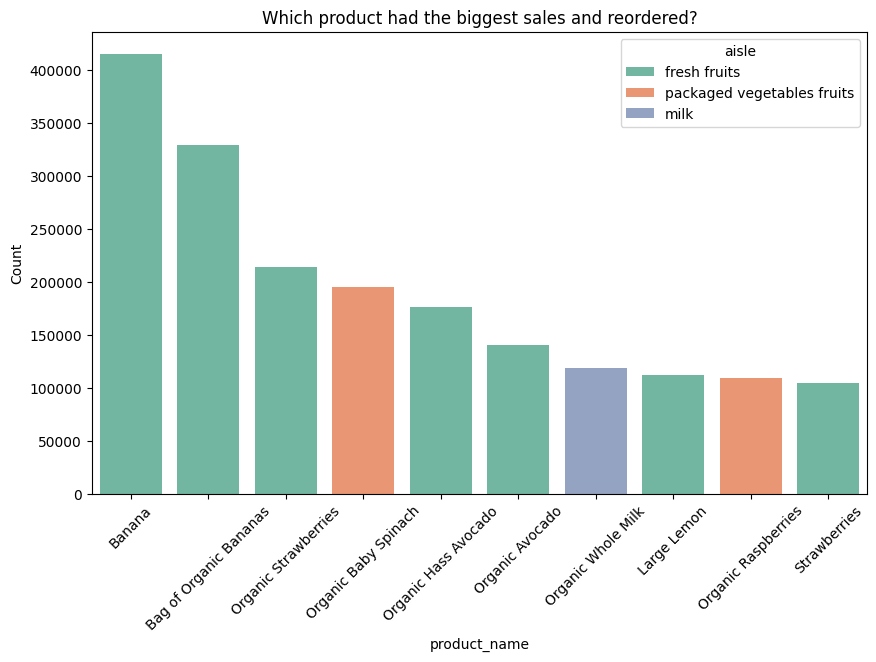

In [18]:
df_visualization_q1 = df_visualization.groupby(['product_name','aisle'])['add_to_cart_order'].sum().reset_index()
df_visualization_q1 = df_visualization_q1.sort_values(by='add_to_cart_order', ascending=False)
df_visualization_q1 = df_visualization_q1.iloc[:10]
plt.subplot(2,1,1)
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y="add_to_cart_order", hue="aisle", data=df_visualization_q1, palette='Set2')
plt.title("Which product had the biggest sales and reordered?")
plt.xlabel('product_name')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.subplot(2,1,2)
df_visualization_q1 = df_visualization.groupby(['product_name','aisle'])['reordered'].sum().reset_index()
df_visualization_q1 = df_visualization_q1.sort_values(by='reordered', ascending=False)
df_visualization_q1 = df_visualization_q1.iloc[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y="reordered", hue="aisle", data=df_visualization_q1, palette='Set2')
plt.title("Which product had the biggest sales and reordered?")
plt.xlabel('product_name')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

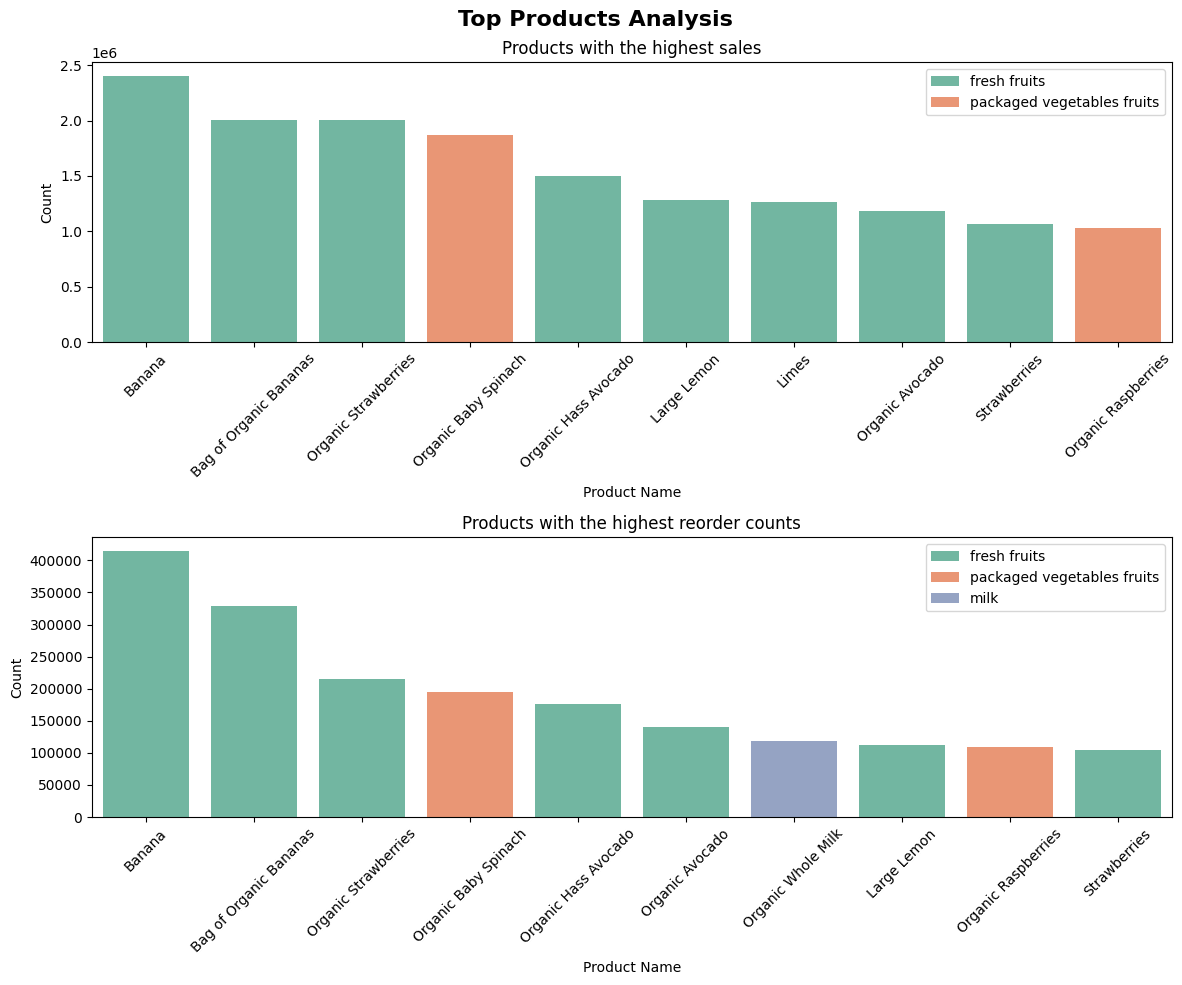

In [20]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
df_visualization_q1 = df_visualization.groupby(['product_name','aisle'])['add_to_cart_order'].sum().reset_index()
df_visualization_q1 = df_visualization_q1.sort_values(by='add_to_cart_order', ascending=False)
df_visualization_q1 = df_visualization_q1.iloc[:10]
sns.barplot(x='product_name', y="add_to_cart_order", hue="aisle", data=df_visualization_q1, palette='Set2')
plt.title("Products with the highest sales")
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
df_visualization_q2 = df_visualization.groupby(['product_name','aisle'])['reordered'].sum().reset_index()
df_visualization_q2 = df_visualization_q2.sort_values(by='reordered', ascending=False)
df_visualization_q2 = df_visualization_q2.iloc[:10]
sns.barplot(x='product_name', y="reordered", hue="aisle", data=df_visualization_q2, palette='Set2')
plt.title("Products with the highest reorder counts")
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.suptitle("Which product had the biggest sales and reordered ?", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
question = 'Which product had the biggest sales and reordered?'
df_visualization_q1 = df_visualization.groupby(['product_name','aisle'])['add_to_cart_order'].sum().reset_index()
df_visualization_q1 = df_visualization_q1.sort_values(by='add_to_cart_order', ascending=False)
df_visualization_q1 = df_visualization_q1.iloc[:10]




x = 'product_name'
y = 'reordered'
z = 'aisle'
df_visualization_q1 = df_visualization.groupby([x,y])[z].sum().reset_index()
df_visualization_q1 = df_visualization_q1.sort_values(by=z, ascending=False)
df_visualization_q1 = df_visualization_q1.iloc[:10]
display(df_visualization_q1)
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, hue=z, data=df_visualization_q1, palette='Set2')
plt.title(z)
plt.xlabel(x)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title=y)
plt.show()

,product_name,aisle,reordered
3677,Banana,fresh fruits,415166
3472,Bag of Organic Bananas,fresh fruits,329275
31923,Organic Strawberries,fresh fruits,214448
28843,Organic Baby Spinach,packaged vegetables fruits,194939
30300,Organic Hass Avocado,fresh fruits,176173
28807,Organic Avocado,fresh fruits,140270
32481,Organic Whole Milk,milk,118684
22415,Large Lemon,fresh fruits,112178
31366,Organic Raspberries,packaged vegetables fruits,109688
42908,Strawberries,fresh fruits,104588


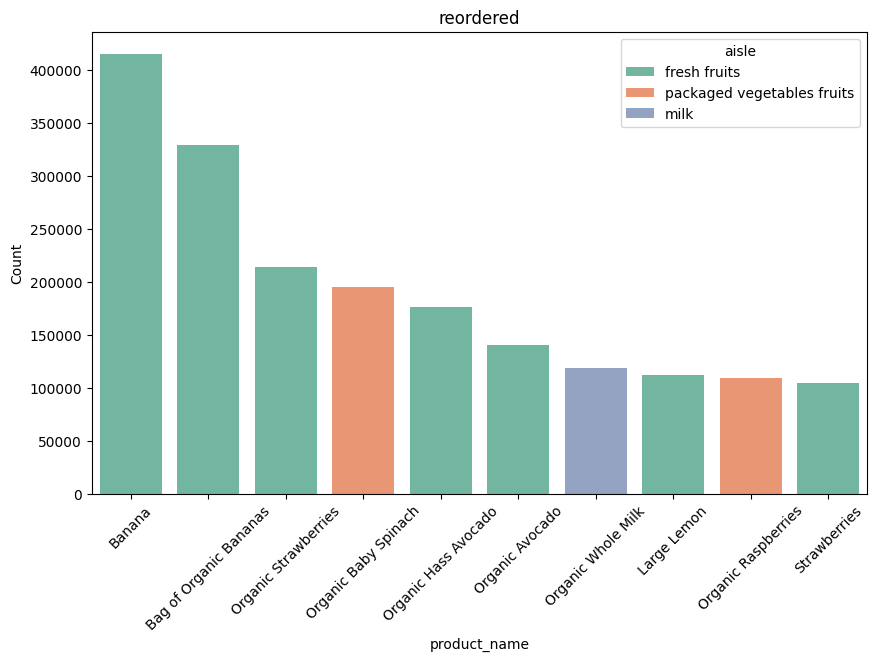

In [20]:
x = 'product_name'
y = 'reordered'
z = 'aisle'
df_visualization_q1 = df_visualization.groupby([x,y])[z].sum().reset_index()
df_visualization_q1 = df_visualization_q1.sort_values(by=z, ascending=False)
df_visualization_q1 = df_visualization_q1.iloc[:10]
display(df_visualization_q1)
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, hue=z, data=df_visualization_q1, palette='Set2')
plt.title(z)
plt.xlabel(x)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title=y)
plt.show()


In [ ]:
df_visualization_q1

,product_name,aisle,reordered
3677,Banana,fresh fruits,415166
3472,Bag of Organic Bananas,fresh fruits,329275
31923,Organic Strawberries,fresh fruits,214448
28843,Organic Baby Spinach,packaged vegetables fruits,194939
30300,Organic Hass Avocado,fresh fruits,176173
28807,Organic Avocado,fresh fruits,140270
32481,Organic Whole Milk,milk,118684
22415,Large Lemon,fresh fruits,112178
31366,Organic Raspberries,packaged vegetables fruits,109688
42908,Strawberries,fresh fruits,104588


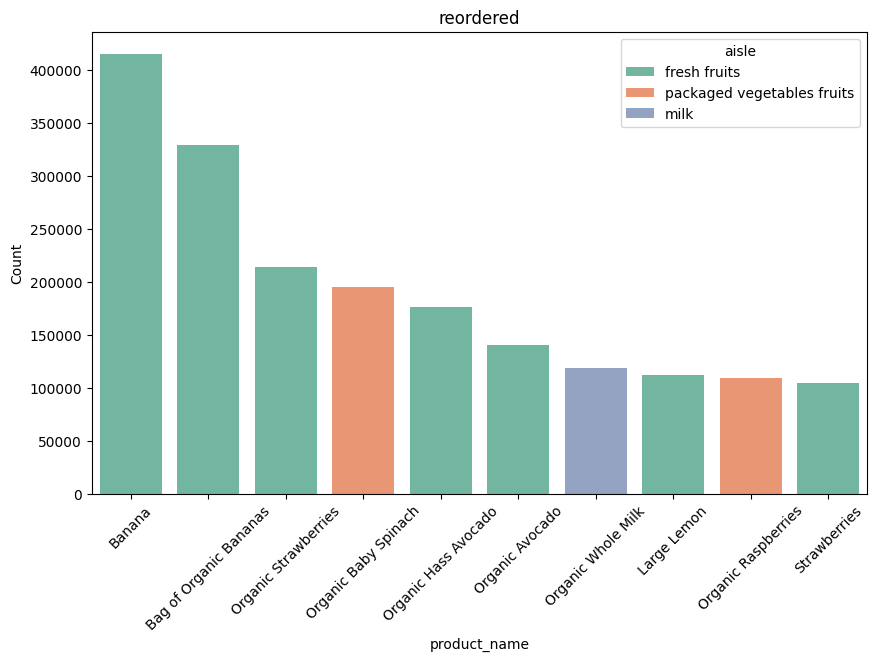

In [19]:
x = 'product_name'
y = 'aisle'
z = 'reordered'
df_visualization_q1 = df_visualization.groupby([x,y])[z].sum().reset_index()
df_visualization_q1 = df_visualization_q1.sort_values(by=z, ascending=False)
df_visualization_q1 = df_visualization_q1.iloc[:10]
display(df_visualization_q1)
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=z, hue=y, data=df_visualization_q1, palette='Set2')
plt.title(z)
plt.xlabel(x)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title=y)
plt.show()

In [17]:
df_visualization

,add_to_cart_order,reordered,product_name,aisle,eval_set,order_dow,order_hour_of_day,days_since_prior_order,user_id
0,1,1,Organic Egg Whites,eggs,prior,5,9,8.0,202279
1,2,1,Michigan Organic Kale,fresh vegetables,prior,5,9,8.0,202279
2,3,0,Garlic Powder,spices seasonings,prior,5,9,8.0,202279
3,4,1,Coconut Butter,oils vinegars,prior,5,9,8.0,202279
4,5,0,Natural Sweetener,baking ingredients,prior,5,9,8.0,202279
...,...,...,...,...,...,...,...,...,...
33819101,3,1,Natural Artesian Water,water seltzer sparkling water,train,0,10,4.0,169679
33819102,4,1,Twice Baked Potatoes,prepared meals,train,0,10,4.0,169679
33819103,1,1,Organic Unsweetened Almond Milk,soy lactosefree,train,6,10,8.0,139822
33819104,2,1,Creamy Peanut Butter,spreads,train,6,10,8.0,139822


# 2 Statistical analysis
### Note: It is not possible to carry out poison studies due to the lack of the year of registration.
### Poisson is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if those events occur with a known constant average rate and regardless of the time since the last event, in which case product sales, I would suggest a study to increase sales probabilities using order_dow, order_hour_of_day, days_since_prior_order

## 2.1 Descriptive Statistics Statistical graphs

## 2.2 Inferential Statistics Hypothesis testing

## 2.3 Inferential Statistics Principal Component Analysis (PCA)

# 3 Customer Segmentation: 
#### Can you segment customers based on their ordering behavior, such as frequency, time of day, or days since prior order, to better understand their preferences and propose ways to optimize marketing strategies?

# 4 Inventory Management:
### Inventory Management: Implement a predictive model that estimates inventory levels
### for individual products across different departments and aisles, taking into consideration the day of the week and hour. Please note the following points:
### Note 1 - The model should be predictive, not a forecasting model.
### Note 2 - Explain how this predictive model can be applied to optimize stock levels and minimize waste.

# 5 Order Fulfillment (Bonus points): 
### How can we optimize the order fulfillment process, considering factors like the day of the week and time of day when most orders are placed, to ensure timely and efficient deliveries to customers while minimizing operational costs?

### Classificar os produtos em velocidade de compra, estudar as distribuidoras que tem mais fluxo e comparar com as de menores fluxo e estudar comportamentos

#  6 Given the brevity of this exercise:
### outline the additional work/action items you would take to solve this challenge if you were given 2 additional weeks to complete the assignment.